## Business Case - Fraud Detection
Using data provided by customers when appliying for credit card, identify cheating

Goal - identify segment which contains customers who have commited fraud

We can identify these as they will be outliers in the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
#Create subsets of the data - every column but the last and the last one
#The last column - Class shows the applications that were approved
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
#Feature Scaling - Normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [6]:
# Training the SOM
#Minisom - implementation of self organising maps
#x, y are the dimensions of the map
#input_len - the number of features in the dataset X
#sigma - radius of the neighbourhood in the grid
#learning_rate - by how much to adjust the radius in each iteration
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X) #Initialise weights
som.train_random(data = X, num_iteration = 100) #Train random map 100 times

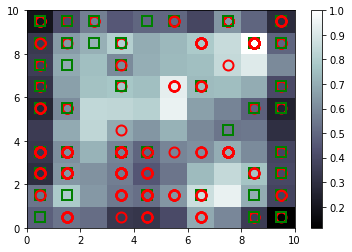

In [7]:
#Visualising the results
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone() #Initialise the window
pcolor(som.distance_map().T) #Mean Interneuron Distances
colorbar() #Add colour bar to window
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X): #For each customer
    w = som.winner(x) #Find the winning node
    plot(w[0] + 0.5,  #Positioning in the centre of the square
         w[1] + 0.5,
         markers[y[i]], #marker for approval/not
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Reading the Result

- We can see the fraudulent customers by looking at the SOM colour range
- Where there are white blocks this denotes a node which has a large MID - it is far away from their neighbours, these are the fraudulent nodes
- We then overlay red circles on customers who did not get approval and green squares on customers who did get approved

In [13]:
# Finding the frauds
#Create a dictionary of the mappings between the customers and the nodes
mappings = som.win_map(X)

#Using the coordinates from the map of the outliers
frauds = np.concatenate((mappings[(8,8)], mappings[(5,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
#Get the customer IDs
frauds = [f[0] for f in frauds]

In [16]:
frauds

[15739548.0,
 15699839.0,
 15705918.0,
 15706762.0,
 15672894.0,
 15783883.0,
 15756538.0,
 15728523.0,
 15646594.0,
 15675926.0,
 15794204.0,
 15734008.0,
 15757434.0,
 15769548.0,
 15593834.0,
 15673907.0,
 15737909.0,
 15660528.0,
 15779207.0,
 15609987.0,
 15752578.0,
 15666096.0,
 15609758.0,
 15611682.0,
 15615296.0,
 15618258.0,
 15805261.0,
 15719940.0,
 15761733.0,
 15736399.0,
 15766734.0,
 15667934.0]